In [8]:
from community import community_louvain
import matplotlib.cm as cm
from matplotlib import colormaps
import matplotlib.pyplot as plt
import networkx as nx

from pathlib import Path
import random
import math

/tmp/ipykernel_63345/4065347215.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("viridis", max(partition.values()) + 1)


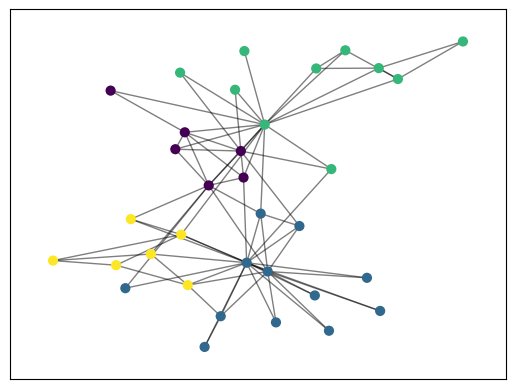

In [9]:
# load the karate club graph
G = nx.karate_club_graph()

# compute the best partition
partition = community_louvain.best_partition(G)

# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap("viridis", max(partition.values()) + 1)
nx.draw_networkx_nodes(
    G,
    pos,
    partition.keys(),
    node_size=40,
    cmap=cmap,
    node_color=list(partition.values()),
)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [10]:
def cluster_graph(filepath: str | Path, ax=None):
    if isinstance(filepath, str):
        filepath = Path(filepath)

    if not filepath.exists():
        return

    G = nx.read_graphml(str(filepath))
    partition = community_louvain.best_partition(G)
    pos = nx.spring_layout(G)
    cmap = colormaps.get_cmap("viridis")

    nx.draw_networkx_nodes(
        G,
        pos,
        partition.keys(),
        node_size=40,
        cmap=cmap,
        node_color=list(partition.values()),
        ax=ax,
    )
    nx.draw_networkx_edges(G, pos, alpha=0.5, ax=ax)

    topology = str(filepath.absolute()).split("/")[-1].split(".")[0]
    plt.title(topology)
    plt.show()


In [11]:
airtel_graph = nx.read_graphml("../topologies/Aconet.graphml")
airtel_graph

In [12]:
topology_dir = Path("../topologies")
topologies = tuple(topology_dir.glob("*.graphml"))


In [13]:
len(topologies)

261

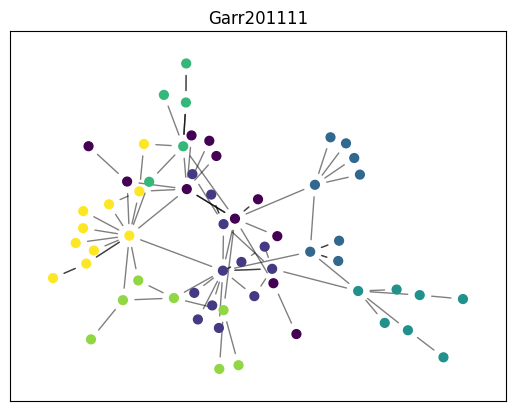

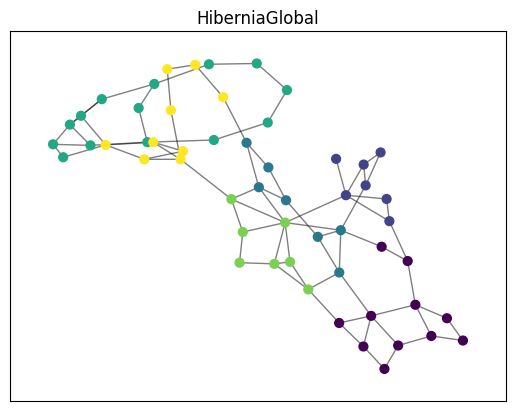

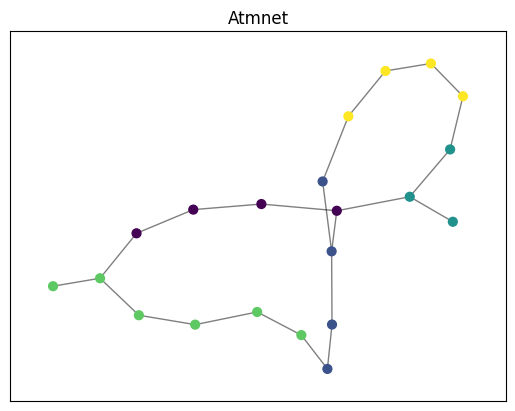

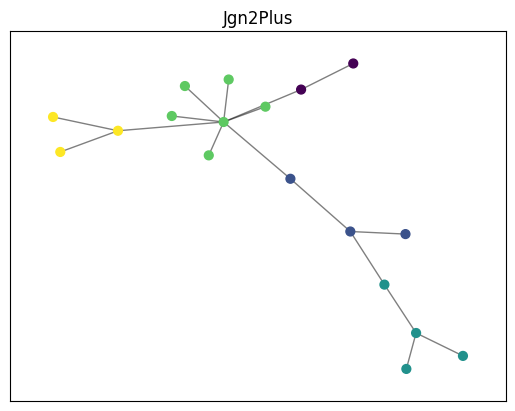

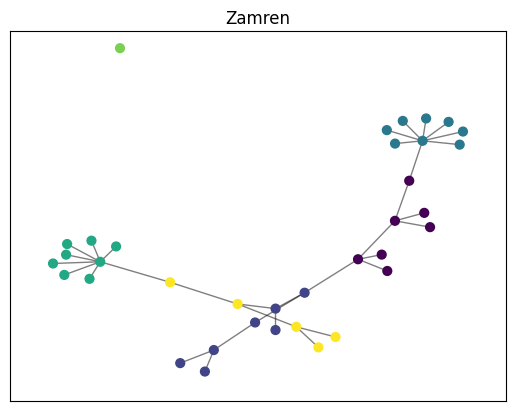

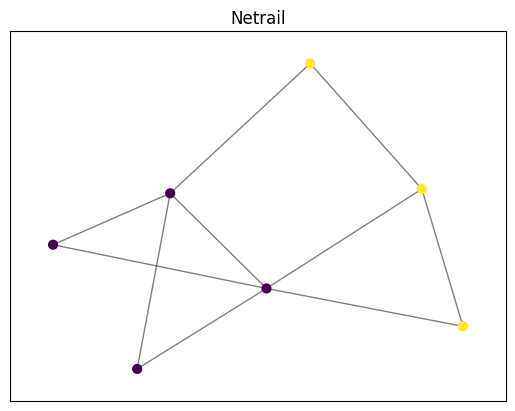

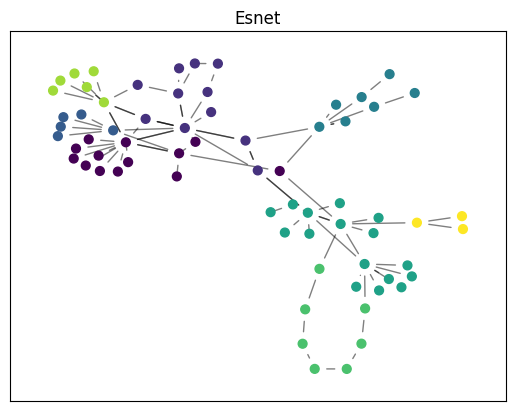

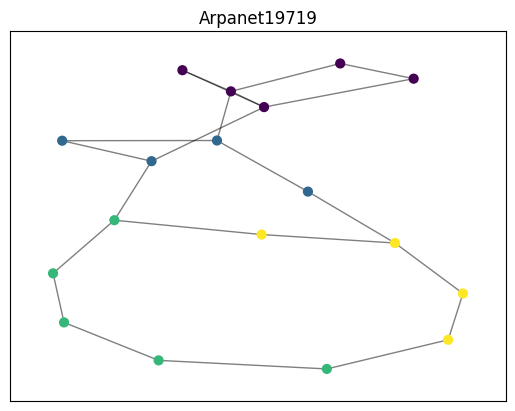

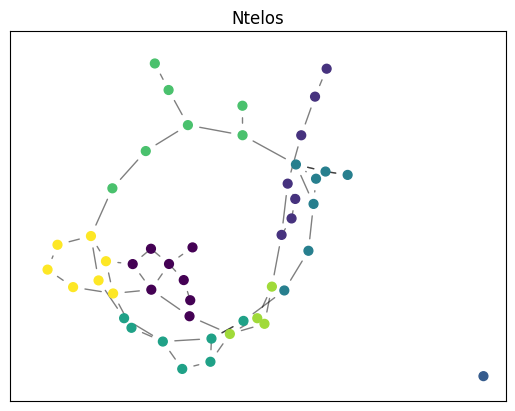

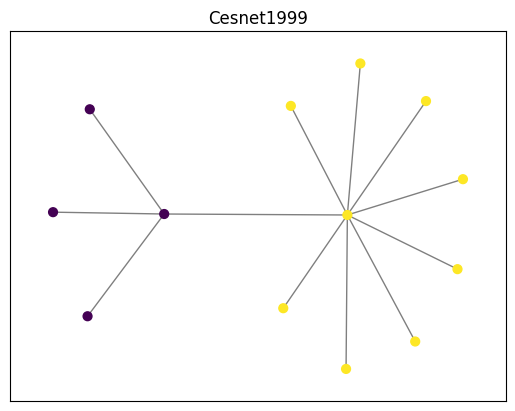

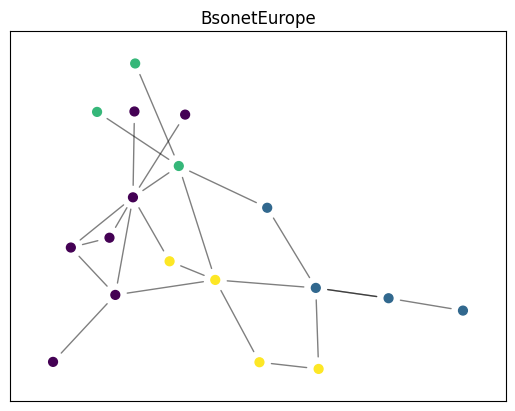

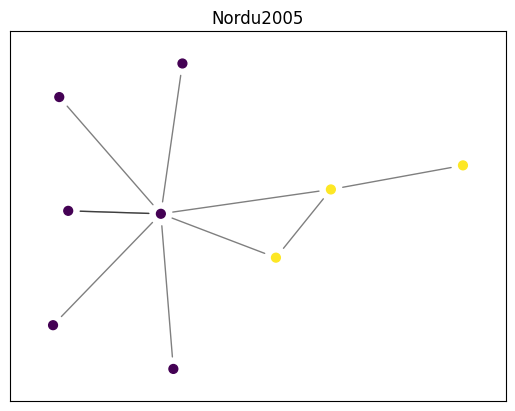

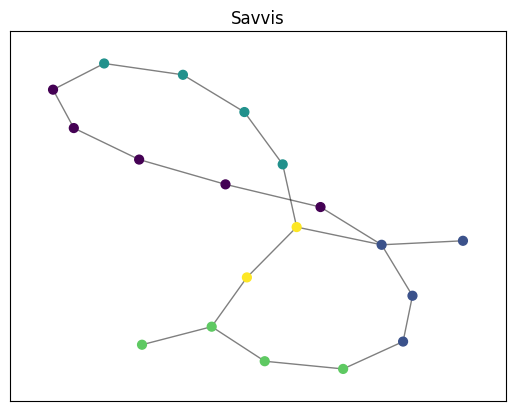

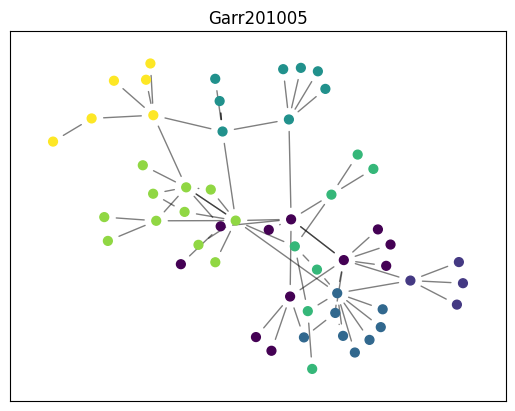

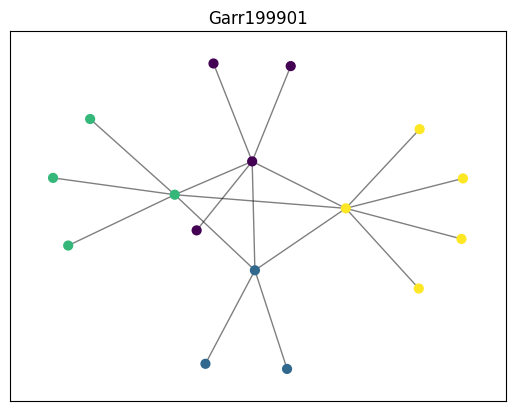

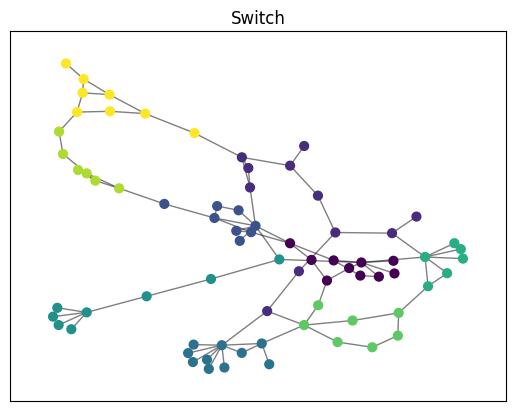

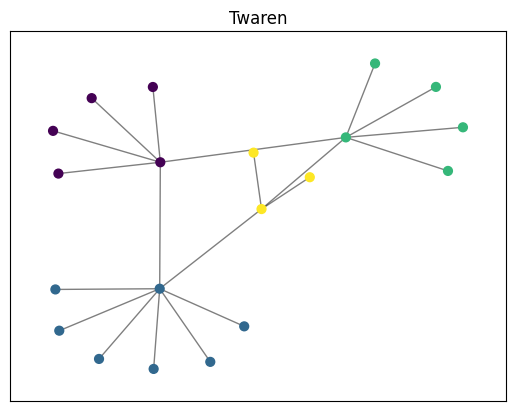

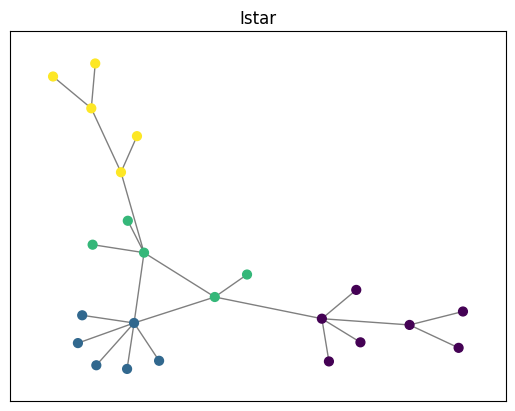

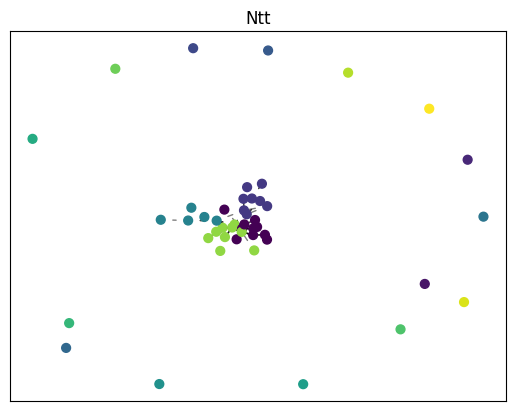

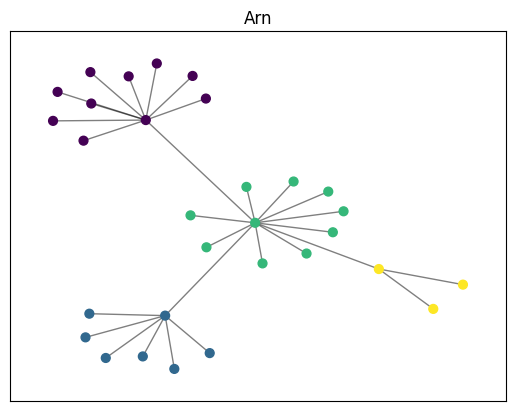

In [14]:
for topo_path in random.sample(topologies, 20):
    cluster_graph(topo_path)